## Work
1. 請改變 reduce_lr 的 patience 和 factor 並比較不同設定下，對訓練/驗證集的影響
2. 請將 optimizer 換成 Adam、RMSprop 搭配 reduce_lr 並比較訓練結果

In [1]:
import os
import keras

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
LEARNING_RATE = 1e-3
EPOCHS = 25 # IF you feel too run to finish, try to make it smaller
BATCH_SIZE = 1024 

In [7]:
# 載入 Callbacks
from keras.callbacks import ReduceLROnPlateau

optimizer_set = [keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=0.95),
                 keras.optimizers.Adam(lr=LEARNING_RATE),
                 keras.optimizers.RMSprop(lr=LEARNING_RATE)]

"""Code Here
建立實驗的比較組合
"""
reduce_lr_factor = [1e-12, 1e-8]
redice_lr_patient = [5,10,25]

Instructions for updating:
Colocations handled automatically by placer.


In [8]:
import itertools
results = {}
for i, (optim, reduce_factor, reduce_patient) in enumerate(itertools.product(optimizer_set, reduce_lr_factor, redice_lr_patient)):
    print("Numbers of exp: %i, reduce_factor: %.2f, reduce_patient: %i" % (i, reduce_factor, reduce_patient))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optim)
    
    """Code Here
    設定 reduce learning rate 的 callback function
    """
    reduce_lr = ReduceLROnPlateau(factor=0.5, 
                              min_lr=reduce_factor, 
                              monitor='val_loss', 
                              patience=reduce_patient, 
                              verbose=1)
    
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[reduce_lr]
             )

    # Collect results
    exp_name_tag = ("exp-%s" % (i))
    results[exp_name_tag] = {'train-loss': model.history.history["loss"],
                             'valid-loss': model.history.history["val_loss"],
                             'train-acc': model.history.history["acc"],
                             'valid-acc': model.history.history["val_acc"]}

Numbers of exp: 0, reduce_factor: 0.00, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalizatio

Epoch 12/25
50000/50000 [==============================] - 2s 40us/step - loss: 1.2420 - acc: 0.5729 - val_loss: 1.4825 - val_acc: 0.4783
Epoch 13/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.2162 - acc: 0.5821 - val_loss: 1.4753 - val_acc: 0.4838
Epoch 14/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.1912 - acc: 0.5919 - val_loss: 1.4675 - val_acc: 0.4859
Epoch 15/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.1652 - acc: 0.6020 - val_loss: 1.4784 - val_acc: 0.4802
Epoch 16/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.1407 - acc: 0.6098 - val_loss: 1.4610 - val_acc: 0.4889
Epoch 17/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.1191 - acc: 0.6192 - val_loss: 1.4661 - val_acc: 0.4879
Epoch 18/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.0961 - acc: 0.6293 - val_loss: 1.4531 - val_acc: 0.4898
Epoch 19/25
50000/50000 [=========

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 3s 54us/step - loss: 2.2194 - acc: 0.2648 - val_loss: 2.0083 - val_acc: 0.3350
Epoch 2/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.7476 - acc: 0.3926 - val_loss: 1.8674 - val_acc: 0.3713
Epoch 3/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.6193 - acc: 0.4339 - val_loss: 1.6832 - val_acc: 0.4126
Epoch 4/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.5418 - acc: 0.4627 - val_loss: 1.6384 - val_acc: 0.4237
Epoch 5/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.4836 - acc: 0.4838 - val_loss: 1.5816 - val_acc: 0.4446
Epoch 6/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.4365 - acc: 0.4990 - val_loss: 1.5676 - val_acc: 0.4487
Epoch 7/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.3974 - acc: 0.5134 - val_loss: 1.5534 - val_acc

50000/50000 [==============================] - 2s 40us/step - loss: 1.2032 - acc: 0.5859 - val_loss: 1.4968 - val_acc: 0.4759
Epoch 24/25
50000/50000 [==============================] - 2s 39us/step - loss: 1.1897 - acc: 0.5932 - val_loss: 1.4959 - val_acc: 0.4799
Epoch 25/25
50000/50000 [==============================] - 2s 38us/step - loss: 1.1741 - acc: 0.5977 - val_loss: 1.4899 - val_acc: 0.4754
Numbers of exp: 5, reduce_factor: 0.00, reduce_patient: 25
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_16 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_laye


Epoch 00010: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
Epoch 11/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.8958 - acc: 0.6908 - val_loss: 1.7882 - val_acc: 0.4263
Epoch 12/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.8399 - acc: 0.7114 - val_loss: 1.7052 - val_acc: 0.4446
Epoch 13/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.8017 - acc: 0.7257 - val_loss: 1.6324 - val_acc: 0.4530
Epoch 14/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.7675 - acc: 0.7382 - val_loss: 1.5909 - val_acc: 0.4725
Epoch 15/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.7385 - acc: 0.7471 - val_loss: 1.6624 - val_acc: 0.4554
Epoch 16/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.7059 - acc: 0.7605 - val_loss: 1.7019 - val_acc: 0.4597
Epoch 17/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.6738 - ac

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 72us/step - loss: 1.7750 - acc: 0.3834 - val_loss: 1.8092 - val_acc: 0.3722
Epoch 2/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.4849 - acc: 0.4796 - val_loss: 1.6184 - val_acc: 0.4153
Epoch 3/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.3879 - acc: 0.5145 - val_loss: 1.5535 - val_acc: 0.4445
Epoch 4/25
50000/50000 [==============================] - 2s 42us/step - loss: 1.3149 - acc: 0.5397 - val_loss: 1.5827 - val_acc: 0.4412
Epoch 5/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.2542 - acc: 0.5618 - val_loss: 1.5050 - val_acc: 0.4682
Epoch 6/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.2025 - acc: 0.5800 - val_loss: 1.4473 - val_acc: 0.4867
Epoch 7/25
50000/50000 [==============================] - 2s 45us/step - loss: 1.1539 - acc: 0.5977 - val_loss: 1.4559 - val_acc

50000/50000 [==============================] - 2s 43us/step - loss: 0.6073 - acc: 0.8183 - val_loss: 1.4438 - val_acc: 0.5219
Epoch 24/25
50000/50000 [==============================] - 2s 43us/step - loss: 0.5911 - acc: 0.8236 - val_loss: 1.4535 - val_acc: 0.5264
Epoch 25/25
50000/50000 [==============================] - 2s 43us/step - loss: 0.5768 - acc: 0.8298 - val_loss: 1.4697 - val_acc: 0.5231
Numbers of exp: 10, reduce_factor: 0.00, reduce_patient: 10
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_31 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_lay

50000/50000 [==============================] - 2s 43us/step - loss: 1.2034 - acc: 0.5865 - val_loss: 1.5038 - val_acc: 0.4760
Epoch 11/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.1786 - acc: 0.5954 - val_loss: 1.5007 - val_acc: 0.4763
Epoch 12/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.1546 - acc: 0.6055 - val_loss: 1.4626 - val_acc: 0.4885
Epoch 13/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.1337 - acc: 0.6133 - val_loss: 1.4672 - val_acc: 0.4913
Epoch 14/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.1128 - acc: 0.6223 - val_loss: 1.4527 - val_acc: 0.4890
Epoch 15/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.0943 - acc: 0.6298 - val_loss: 1.4693 - val_acc: 0.4879
Epoch 16/25
50000/50000 [==============================] - 2s 43us/step - loss: 1.0750 - acc: 0.6367 - val_loss: 1.4504 - val_acc: 0.4971
Epoch 17/25
50000/50000 [=====================

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 4s 78us/step - loss: 1.8047 - acc: 0.3773 - val_loss: 2.2898 - val_acc: 0.3034
Epoch 2/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.5282 - acc: 0.4622 - val_loss: 2.0738 - val_acc: 0.3059
Epoch 3/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.4238 - acc: 0.5009 - val_loss: 1.9104 - val_acc: 0.3628
Epoch 4/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.3441 - acc: 0.5292 - val_loss: 2.3565 - val_acc: 0.2968
Epoch 5/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.2839 - acc: 0.5516 - val_loss: 1.7779 - val_acc: 0.3980
Epoch 6/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.2321 - acc: 0.5697 - val_loss: 2.4327 - val_acc: 0.2962
Epoch 7/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.1906 - acc: 0.5865 - val_loss: 2.0186 - val_acc

50000/50000 [==============================] - 2s 42us/step - loss: 0.6568 - acc: 0.7853 - val_loss: 2.0575 - val_acc: 0.4323
Epoch 25/25
50000/50000 [==============================] - 2s 41us/step - loss: 0.6319 - acc: 0.7949 - val_loss: 2.1986 - val_acc: 0.3970
Numbers of exp: 15, reduce_factor: 0.00, reduce_patient: 5
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_46 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalizati

Epoch 10/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.3698 - acc: 0.5253 - val_loss: 1.5749 - val_acc: 0.4468
Epoch 11/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.3432 - acc: 0.5350 - val_loss: 1.5516 - val_acc: 0.4524
Epoch 12/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.3186 - acc: 0.5433 - val_loss: 1.5454 - val_acc: 0.4552
Epoch 13/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.2939 - acc: 0.5536 - val_loss: 1.5191 - val_acc: 0.4690
Epoch 14/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.2717 - acc: 0.5609 - val_loss: 1.5223 - val_acc: 0.4635
Epoch 15/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.2502 - acc: 0.5690 - val_loss: 1.5148 - val_acc: 0.4652
Epoch 16/25
50000/50000 [==============================] - 2s 41us/step - loss: 1.2299 - acc: 0.5763 - val_loss: 1.5092 - val_acc: 0.4687
Epoch 17/25
50000/50000 [=========

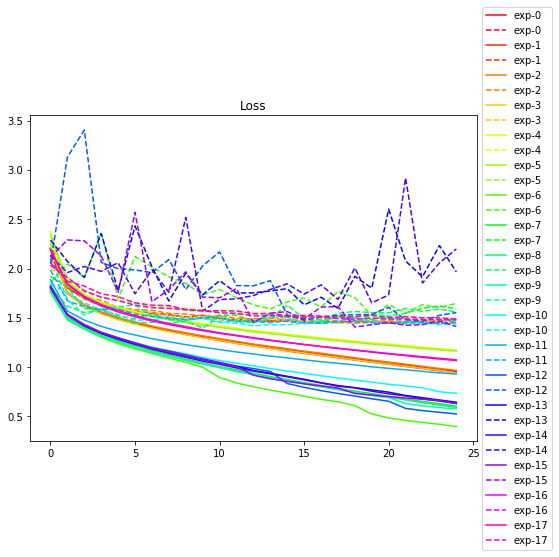

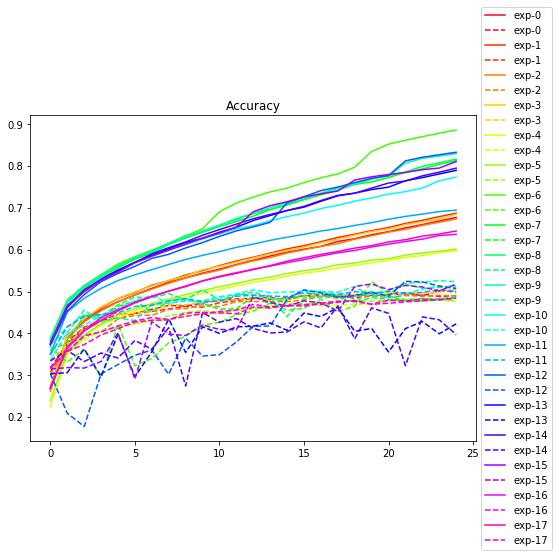

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
%matplotlib inline
NUM_COLORS = len(results.keys())

cm = plt.get_cmap('gist_rainbow')
cNorm  = colors.Normalize(vmin=0, vmax=NUM_COLORS-1)
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()